## Artist Performance Analysis ##

## Part 1: Cleaning the data
---------

The first part of our project is cleaning the "Popular_Spotify_Songs.csv" file for analysis and visualization purposses through the code


In [30]:
#Importing dependecies/libraries for analysis and maniplation purposes

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [31]:
# Defining the file path to find the data from "Popular_Spotify_Songs.csv" file
spotify_file = Path('Resources/Popular_Spotify_Songs.csv')

# Reading "Popular_Spotify_Songs.csv" file to pull in data to create a dataframe
top_streaming_platform_songs= pd.read_csv(spotify_file)

#Displaying all the data
top_streaming_platform_songs.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [32]:
test_df = top_streaming_platform_songs
test_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [33]:
## Dropping the entire row of any "track_name" that has a specical character

is_readable = lambda x: all(ord(c) < 128 for c in str(x))

# Filter the DataFrame to drop rows with unreadable characters
cleaned_top_songs = top_streaming_platform_songs[top_streaming_platform_songs.map(is_readable).all(axis=1)]

cleaned_top_songs.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [34]:
print(len(cleaned_top_songs['artist_count']))
print(len(test_df['artist_count']))
print(cleaned_top_songs['released_month'].nunique())
print(test_df['released_month'].nunique())
print(cleaned_top_songs['released_month'].value_counts())
print(test_df['released_month'].value_counts())

844
953
12
12
released_month
1     119
5     111
6      78
3      73
11     73
12     69
10     64
4      58
7      57
2      54
9      50
8      38
Name: count, dtype: int64
released_month
1     134
5     128
3      86
6      86
11     80
12     75
10     73
4      66
7      62
2      61
9      56
8      46
Name: count, dtype: int64


In [35]:
cleaned_top_songs.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [36]:
# Overriding "cleaned_top_spotify_songs" dataframe with only columns that will be used for analysis and visualization 

cleaned_top_songs = cleaned_top_songs[['artist(s)_name', 'track_name', 'artist_count', 'released_year', 'released_month', 'released_day' , 'in_spotify_playlists', 'in_spotify_charts',     ##Maybe add .loc if really necessary
                                                      'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%']]

#Displaying cleaned dataframe with
cleaned_top_songs

,artist(s)_name,track_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),2,2023,7,14,553,147,141381703,43,263,45,10,826,125,80
1,Myke Towers,LALA,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,71
2,Olivia Rodrigo,vampire,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,51
3,Taylor Swift,Cruel Summer,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,55
4,Bad Bunny,WHERE SHE GOES,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Selena Gomez,My Mind & Me,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,60
949,Taylor Swift,Bigger Than The Whole Sky,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,42
950,"Feid, Paulo Londra",A Veces (feat. Feid),2,2022,11,3,573,0,73513683,2,0,7,0,0,92,80
951,"Feid, Sech, Jhayco",En La De Ella,3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,82


In [37]:
# MAYBE: Overriding "cleaned_top_spotify_songs" dataframe with new column names that are more intuitive  

----------
## Top Months to Release Songs
----------

In [38]:
import calendar

# Finding the months that have the most released song throughout years 1930 to 2023
month_most_released_songs_series = cleaned_top_songs['released_month'].value_counts()

month_num_list=[1,2,3,4,5,6,7,8,9,10,11,12]

#Empty List to append the names of each month instead of a numerical value for each month (Ex: 1=> Janurary)
month_name_list=[]

# Creating a dataframe from series "month_most_released_songs_series"
month_most_released_songs_df = pd.DataFrame(month_most_released_songs_series).sort_values('released_month')

# For loop to find each month in the 'month_num' list above
for month_num in month_num_list:

  # Appending the changed month name into the new list called "month_name"
  month_name_list.append(calendar.month_name[month_num])


# Creating a new dataframe "new_months" with month name and song count
new_months_df = pd.DataFrame({'Months':month_name_list, 'Song Count':month_most_released_songs_df['count']})

# Resetting and dropping index to have a clean dataframe with "Months" as names instead of numbers and "Song Count" of each months for number of songs released in those months
new_months_df = new_months_df.reset_index(drop=True)  # Drop the old index if desired

#Displaying 'new_months' dataframe
new_months_df



,Months,Song Count
0,January,119
1,February,54
2,March,73
3,April,58
4,May,111
5,June,78
6,July,57
7,August,38
8,September,50
9,October,64


In [39]:
month_most_released_songs_df

,count
released_month,
1,119
2,54
3,73
4,58
5,111
6,78
7,57
8,38
9,50


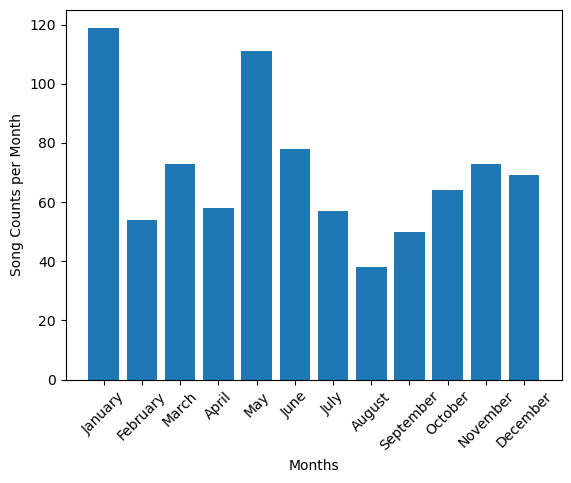

In [40]:
# Creating visualization for "Months" vs "Song Count per Month"

#Defining x & y-axes for bar chart
x_axis = new_months_df['Months']
y_axis = new_months_df['Song Count']

# Creating bar chart for "Months" vs "Song Count per Month"
plt.bar(x_axis,y_axis)

# Making x-axis labels more visually appealing 
plt.xticks(rotation = 45)

#Defining x & y-axes labels for bar chart
plt.xlabel('Months')
plt.ylabel('Song Counts per Month')

#Diplay Bar Graph-
plt.show()


## Months vs Song Count Analysis 
* Seems like the artists tend to release songs going into each new season - (Fall, Winter, Spring, Summer)

----------
## Performance of Collaborating vs Solo Artists
----------

In [41]:
cleaned_top_songs.head()

,artist(s)_name,track_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),2,2023,7,14,553,147,141381703,43,263,45,10,826,125,80
1,Myke Towers,LALA,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,71
2,Olivia Rodrigo,vampire,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,51
3,Taylor Swift,Cruel Summer,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,55
4,Bad Bunny,WHERE SHE GOES,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,65


In [42]:
# Dataframe of songs that were created just by an individual artist
solo_artists_df = cleaned_top_songs[cleaned_top_songs['artist_count'] <= 1]
#solo_artists_df

# Dataframe of songs that were created as collobrations from 2 or more artists
collab_artists_df = cleaned_top_songs[cleaned_top_songs['artist_count'] > 1]
collab_artists_df

,artist(s)_name,track_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),2,2023,7,14,553,147,141381703,43,263,45,10,826,125,80
5,"Dave, Central Cee",Sprinter,2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,92
6,"Eslabon Armado, Peso Pluma",Ella Baila Sola,2,2023,3,16,3090,50,725980112,34,222,43,13,418,148,67
9,"Peso Pluma, Yng Lvcas",La Bebe - Remix,2,2023,3,17,2953,44,553634067,49,110,66,13,339,170,81
10,"Bad Bunny, Grupo Frontera",un x100to,2,2023,4,17,2876,40,505671438,41,205,54,12,251,83,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,"Ludwig Goransson, Foudeqush",Con La Brisa,2,2022,11,4,486,0,71095708,8,1,7,0,0,114,62
943,"Drake, 21 Savage",Privileged Rappers,2,2022,11,4,1007,0,112436403,6,5,3,0,0,144,93
946,"Drake, 21 Savage",Broke Boys,2,2022,11,4,1060,0,106249219,3,8,5,0,0,120,64
950,"Feid, Paulo Londra",A Veces (feat. Feid),2,2022,11,3,573,0,73513683,2,0,7,0,0,92,80


In [43]:
# df = df.query('streams != "BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3"')

## danceability to number of streams

There is no correlation between danceability and streams. In fact, there is a slight negative correlation, meaning that as one increases, the other decreases, however it is insignificant. We looked at this to see if creating a song that is fun, poppy, and danceable had any effect or relation to its popularity on spotify. This calculation shows that it does not have any impact on the amount of streams, and does not guarantee success for a song. Comparatively, neither does bpm. These results give more creative freedom to our user, meaning they can develop a song to their preferred pace/rhythm 

The correlation between danceability and number of streams is: -0.11


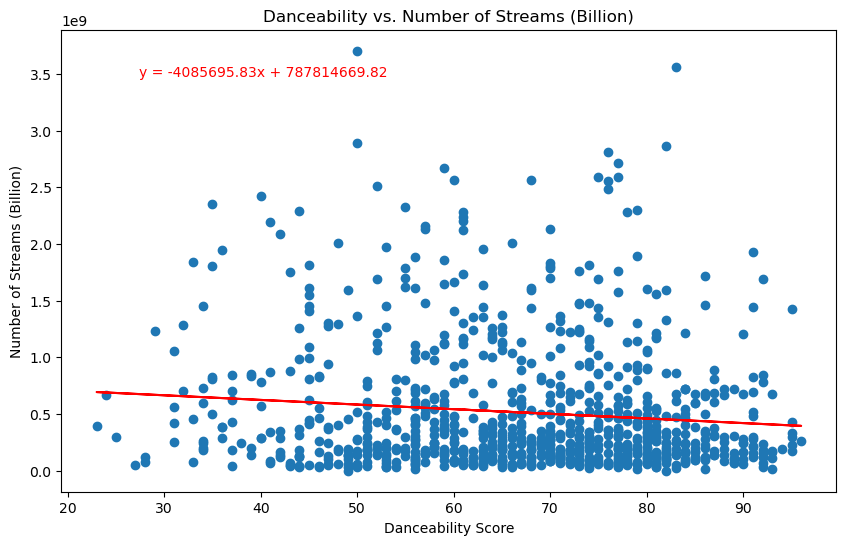

In [45]:
from scipy.stats import linregress, pearsonr
import matplotlib.pyplot as plt

# Convert columns to numeric data type if necessary
test_df['danceability_%'] = pd.to_numeric(test_df['danceability_%'], errors='coerce')
test_df['streams'] = pd.to_numeric(test_df['streams'], errors='coerce')

# Drop rows with NaN values in either 'danceability_%' or 'streams' column
test_df = test_df.dropna(subset=['danceability_%', 'streams']).copy()

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(test_df['danceability_%'], test_df['streams'])
print(f"The correlation between danceability and number of streams is: {round(correlation_coefficient, 2)}")

# Perform linear regression
slope, intercept, _, _, _ = linregress(test_df['danceability_%'], test_df['streams'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(test_df['danceability_%'], test_df['streams'])

# Plot the regression line
plt.plot(test_df['danceability_%'], slope * test_df['danceability_%'] + intercept, color='red')

# Add linear regression equation annotation
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=10, color='red')

# Set the title and labels
plt.title('Danceability vs. Number of Streams (Billion)')
plt.xlabel('Danceability Score')
plt.ylabel('Number of Streams (Billion)')

# Show the plot
plt.show()

The correlation between release month and danceability is: -0.05


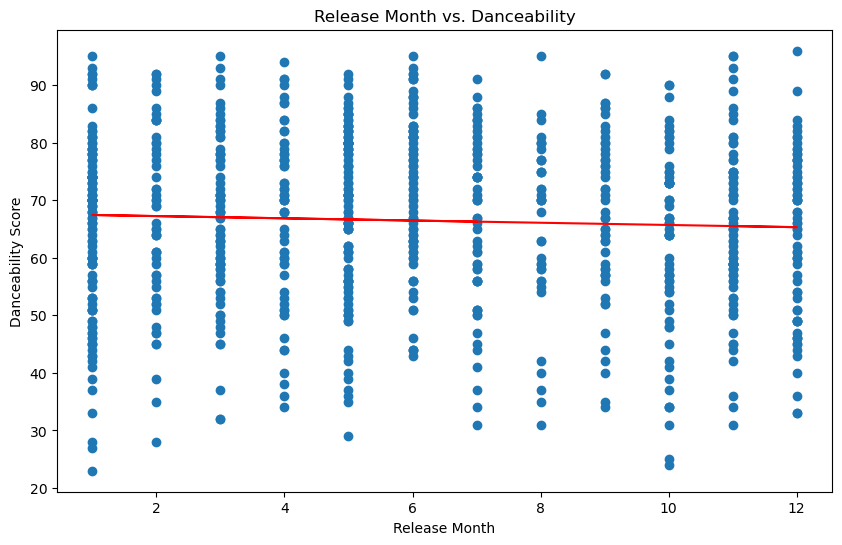

In [19]:
from scipy.stats import linregress, pearsonr
import matplotlib.pyplot as plt

# Convert release month to numeric data type if necessary
cleaned_top_songs['released_month'] = pd.to_numeric(cleaned_top_songs['released_month'], errors='coerce')

# Drop rows with NaN values in either 'released_month' or 'danceability_%' column
cleaned_top_songs = cleaned_top_songs.dropna(subset=['released_month', 'danceability_%']).copy()

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(cleaned_top_songs['released_month'], cleaned_top_songs['danceability_%'])
print(f"The correlation between release month and danceability is: {round(correlation_coefficient, 2)}")

# Perform linear regression
slope, intercept, _, _, _ = linregress(cleaned_top_songs['released_month'], cleaned_top_songs['danceability_%'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_top_songs['released_month'], cleaned_top_songs['danceability_%'])

# Plot the regression line
plt.plot(cleaned_top_songs['released_month'], slope * cleaned_top_songs['released_month'] + intercept, color='red')

# Set the title and labels
plt.title('Release Month vs. Danceability')
plt.xlabel('Release Month')
plt.ylabel('Danceability Score')

# Show the plot
plt.show()

The correlation between danceability and bpm is is: -0.15


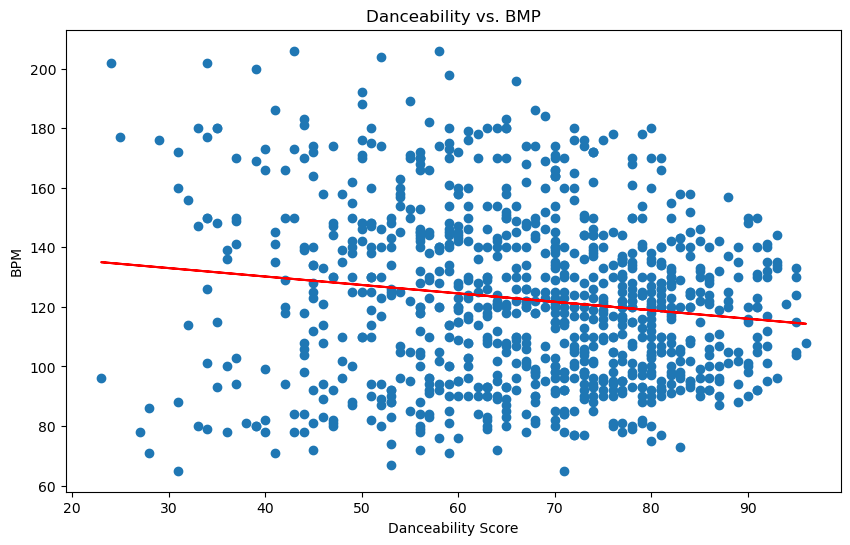

In [26]:
from scipy.stats import linregress, pearsonr
import matplotlib.pyplot as plt

# Convert columns to numeric data type if necessary
test_df['bpm'] = pd.to_numeric(test_df['bpm'], errors='coerce')
test_df['danceability_%'] = pd.to_numeric(test_df['danceability_%'], errors='coerce')

# Drop rows with NaN values in either 'bpm' or 'danceability_%' column
# test_df = test_df.dropna(subset=['bpm', 'danceability_%']).copy()
# test_df = test_df.dropna(subset=['bpm', 'danceability_%']).copy()
test_df = test_df.dropna(subset=['danceability_%', 'bpm']).copy()

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(test_df['danceability_%'], test_df['bpm'])
print(f"The correlation between danceability and bpm is is: {round(correlation_coefficient, 2)}")

# Perform linear regression
slope, intercept, _, _, _ = linregress(test_df['danceability_%'], test_df['bpm'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(test_df['danceability_%'], test_df['bpm'])

# Plot the regression line
plt.plot(test_df['danceability_%'], slope * test_df['danceability_%'] + intercept, color='red')

# Set the title and labels
plt.title('Danceability vs. BMP')
plt.xlabel('Danceability Score')
plt.ylabel('BPM')

# Show the plot
plt.show()

 # BPM vs Danceability
 Apparently BPM and Danceability also had no correlation

The correlation between danceability and number of streams is: -0.11
The correlation between danceability and release month is: -0.05
The correlation between number of streams and release month is: -0.02


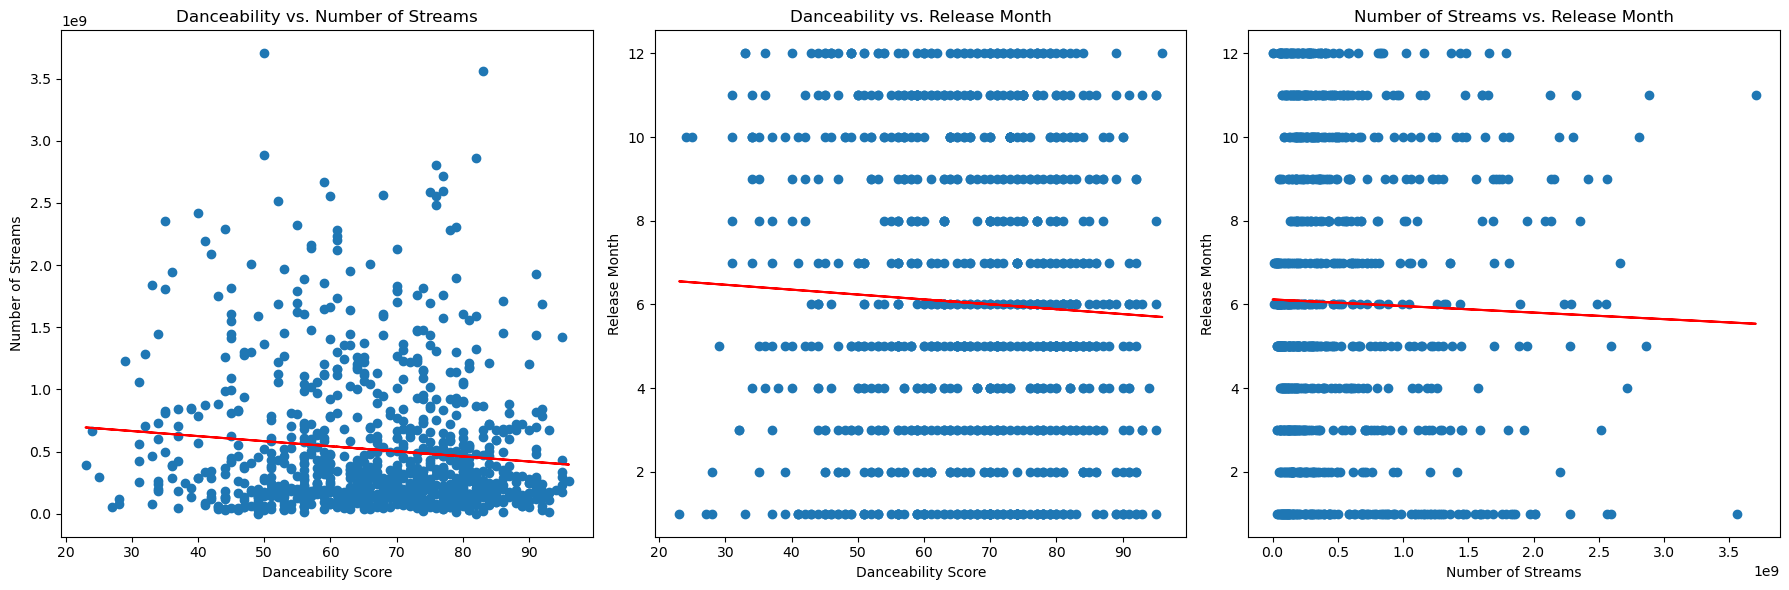

In [105]:
from scipy.stats import linregress, pearsonr
import matplotlib.pyplot as plt
import calendar

# Convert columns to numeric data type if necessary
test_df['danceability_%'] = pd.to_numeric(test_df['danceability_%'], errors='coerce')
test_df['streams'] = pd.to_numeric(test_df['streams'], errors='coerce')
test_df['released_month'] = pd.to_numeric(test_df['released_month'], errors='coerce')

# Drop rows with NaN values in 'danceability_%', 'streams', or 'released_month' columns
test_df = test_df.dropna(subset=['danceability_%', 'streams', 'released_month']).copy()

# Calculate the correlation coefficients
correlation_coefficient_danceability_streams, _ = pearsonr(test_df['danceability_%'], test_df['streams'])
correlation_coefficient_danceability_month, _ = pearsonr(test_df['danceability_%'], test_df['released_month'])
correlation_coefficient_streams_month, _ = pearsonr(test_df['streams'], test_df['released_month'])

print(f"The correlation between danceability and number of streams is: {round(correlation_coefficient_danceability_streams, 2)}")
print(f"The correlation between danceability and release month is: {round(correlation_coefficient_danceability_month, 2)}")
print(f"The correlation between number of streams and release month is: {round(correlation_coefficient_streams_month, 2)}")

# Create the scatter plots
plt.figure(figsize=(18, 6))

# Scatter plot for danceability vs. streams
plt.subplot(1, 3, 1)
plt.scatter(test_df['danceability_%'], test_df['streams'])
plt.title('Danceability vs. Number of Streams')
plt.xlabel('Danceability Score')
plt.ylabel('Number of Streams')

# Add linear regression line
slope, intercept, _, _, _ = linregress(test_df['danceability_%'], test_df['streams'])
plt.plot(test_df['danceability_%'], slope * test_df['danceability_%'] + intercept, color='red')

# Scatter plot for danceability vs. released month
plt.subplot(1, 3, 2)
plt.scatter(test_df['danceability_%'], test_df['released_month'])
plt.title('Danceability vs. Release Month')
plt.xlabel('Danceability Score')
plt.ylabel('Release Month')

# Add linear regression line
slope, intercept, _, _, _ = linregress(test_df['danceability_%'], test_df['released_month'])
plt.plot(test_df['danceability_%'], slope * test_df['danceability_%'] + intercept, color='red')

# Scatter plot for streams vs. released month
plt.subplot(1, 3, 3)
plt.scatter(test_df['streams'], test_df['released_month'])
plt.title('Number of Streams vs. Release Month')
plt.xlabel('Number of Streams')
plt.ylabel('Release Month')

# Add linear regression line
slope, intercept, _, _, _ = linregress(test_df['streams'], test_df['released_month'])
plt.plot(test_df['streams'], slope * test_df['streams'] + intercept, color='red')

# Show the plots
plt.tight_layout()
plt.show()

# Lastly, danceability vs release month vs streams
Apparently there is no correlation between danceability, released months, and amound of streams. I was curious if a more poppy/ danceable song released, say, in may, would have an effect on stream count and popularity, but it looks like it does not. 